### Q1: 
What proportion of students who answer this question quickly will pass the class? Assume the probability of passing the class is 0.9. Assume the probability of answering this question quickly is 0.6 if you'll pass the class, while the probability drops to 0.3 if you'll not pass the class.

### Solution:

We need to calculate:
$$
P(\text{Pass} \mid \text{Quick}) = \frac{P(\text{Quick} \mid \text{Pass})P(\text{Pass})}{P(\text{Quick})}.
$$
Using Bayesian formula. 

Expanding using $P(\text{Quick})$the law of total probability:
$$
P(\text{Quick}) = P(\text{Quick} \mid \text{Pass})P(\text{Pass}) + P(\text{Quick} \mid \text{Fail})P(\text{Pass}),
$$
Thus, we have:
$$
P(\text{Pass} \mid \text{Quick}) = \frac{P(\text{Quick} \mid \text{Pass})P(\text{Pass})}{P(\text{Quick} \mid \text{Pass})P(\text{Pass}) + P(\text{Quick} \mid \text{Fail})P(\text{Pass})}.
$$

From the diagram, we obtained below from given probability:

$$
P(\text{Pass})= q_1 =0.9, P(\text{Fail})=q_0 =0.1,
$$
$$
P(\text{Quick} \mid \text{Fail}) = P_{10} = 0.3, P(\text{Quick} \mid \text{Pass})=P_{11} = 0.6, \\
 P(\text{Slow} \mid \text{Fail})= P_{00} = 0.7, P(\text{Slow} \mid \text{Pass}) P_{01} = 0.4.
$$



Substituting:
$$
P(\text{Pass} \mid \text{Quick}) = \frac{0.9 \cdot 0.6}{(0.9 \cdot 0.6) + (0.1 \cdot 0.3)}.
$$

Simplify:
$$
P(\text{Pass} \mid \text{Quick}) = \frac{0.54}{0.54 + 0.03} = \frac{18}{19}.
$$

Final result:
$$
P(\text{Pass} \mid \text{Quick}) \approx 0.947.
$$

### Q2: 
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**



## Solution:

### Likelihood Derivation
The likelihood is the probability mass function of a multinomial distribution:
$$
p(X \mid \theta, n) = \frac{n!}{X_1! \cdots X_k!} \prod_{i=1}^k \theta_i^{X_i}.
$$

---

### Prior Derivation
The prior is the probability density function of a Dirichlet distribution:
$$
p(\theta \mid \alpha) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1},
$$
where:
$$
B(\alpha) = \frac{\prod_{i=1}^k \Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k \alpha_i\right)}.
$$

and:
$$
\alpha_0 = \sum_{i=1}^k \alpha_i.
$$

---

### Posterior Derivation
Using Bayes' theorem:
$$
p(\theta \mid X, n, \alpha) \propto p(X \mid \theta) \cdot p(\theta).
$$

Substituting the likelihood and prior, here we don't care about the normalization term, we only focus on the kernel part:
$$
p(\theta \mid X, n, \alpha) \propto \left(\prod_{i=1}^k \theta_i^{X_i}\right) \cdot \left(\prod_{i=1}^k \theta_i^{\alpha_i - 1}\right).
$$

Combine exponents:
$$
p(\theta \mid X, n, \alpha) \propto \prod_{i=1}^k \theta_i^{X_i + \alpha_i - 1}.
$$

---

### Result
The posterior is also a Dirichlet distribution with updated parameters:
$$
\alpha_i' = X_i + \alpha_i, \quad \forall i = 1, 2, \dots, k.
$$

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.


In [18]:
from scipy import stats
from scipy.stats import multinomial
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

In [15]:
np.random.seed(1007839181) #set seeds
n_trials = 100  # Number of trials
p_true = [0.2, 0.4, 0.4] #true

sample = np.random.multinomial(n_trials, p_true)
sampled_probabilities = sample / n_trials  # Extract sample probabilities
categories = 3

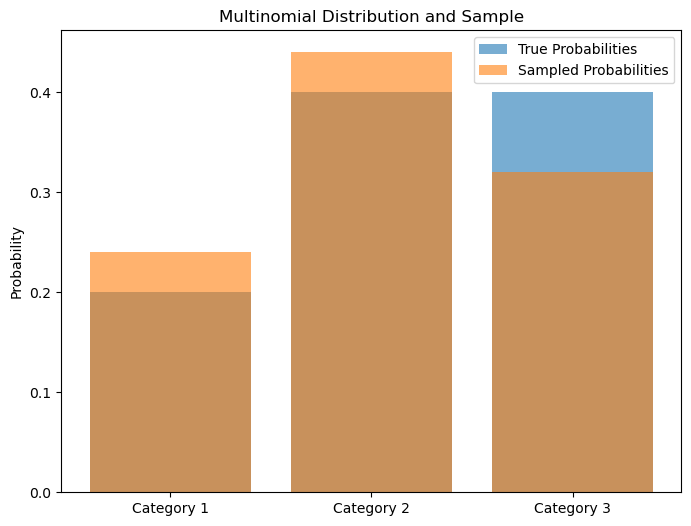

In [16]:
# Visualization of multinomial distribution and sample
plt.figure(figsize=(8, 6))
categories_labels = ['Category 1', 'Category 2', 'Category 3']
plt.bar(categories_labels, p_true, alpha=0.6, label='True Probabilities')
plt.bar(categories_labels, sampled_probabilities, alpha=0.6, label='Sampled Probabilities')
plt.title('Multinomial Distribution and Sample')
plt.ylabel('Probability')
plt.legend()
plt.show()

### Visualize simplex Dirichlet distribution (prior and posterior) 

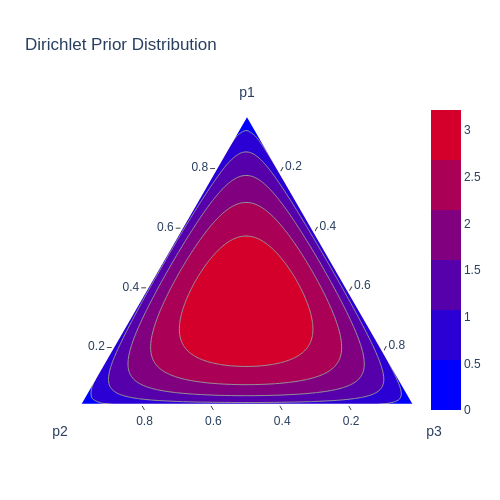

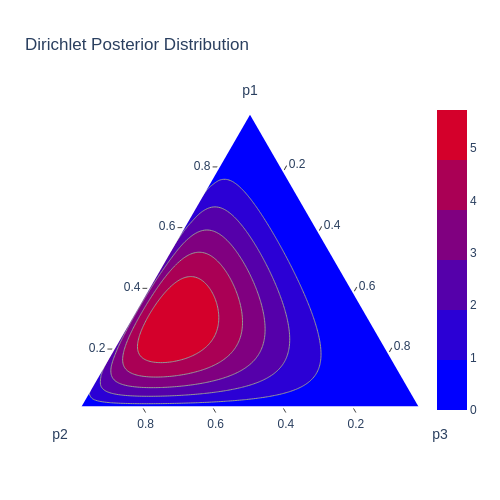

In [20]:
# p1p2p3_scatter = stats.dirichlet(alpha=np.array([1.0, 1.0, 1.0])).rvs(size=100)
p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

#define prior
alpha_prior = np.array([1.5, 1.5, 1.5])  # Prior alpha values
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

# https://plotly.com/python/ternary-contour/ Links to an external site. 
fig_prior_15 = ff.create_ternary_contour(p.T, dirichlet_prior.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],title='Dirichlet Prior Distribution',
                                interp_mode='cartesian',
                                showscale=True)
fig_prior_15.show('png')



# define posterior
alpha_posterior = np.array([2, 3, 1.5])  
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)


fig_posterior = ff.create_ternary_contour(
    p.T,
    dirichlet_posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],title='Dirichlet Posterior Distribution',
    interp_mode='cartesian',
    showscale=True
)
#fig_posterior.update_layout(title='Dirichlet Posterior Distribution') # Add plot title
fig_posterior.show('png')
